**Bank Marketing**


In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

Read Data set

In [300]:
df = pd.read_excel('bank-additional-full.xlsx',sheet_name='Worksheet')

In [301]:
df.duplicated().sum()
df.isnull().sum()
df.shape

(41188, 21)

Cleaning Categorical columns

In [302]:
cat_cols= df.select_dtypes(exclude='number').columns
for i in cat_cols:
  df[i]=df[i].str.capitalize()
  df[i]=df[i].str.strip()
  df[i]=df[i].replace('Unknown',df[i].mode()[0])
df=df.rename(columns={'y':'Target','euribor3m':'Intrest rate 3 month','nr.employed':'No.Employee','emp.var.rate':'Emp variation'
  ,'pdays':'last contacted','duration':'contact duration','campaign':'No Contacts','default':'Payed loan',
                      'cons.conf.idx':'Consumer confidence','emp.var.rate':'Employment variation'
                      ,'previous':'previous contact','cons.price.idx':'Consumer Price Index'})





Numerical Values

In [303]:
num_cols=df.select_dtypes(include='number').columns
df['last contacted']=df['last contacted'].apply(lambda x:0 if x==999 else x) #999 means never contact so we replace by 0



In [304]:
#-1 to 1 range
scale_col = ['Consumer Price Index','Consumer confidence','Employment variation']
for i in scale_col:
  df[i+'_Norm']=2*((df[i]-df[i].min())/(df[i].max()-df[i].min()))-1


In [305]:
encod=['Payed loan','housing','loan','Target']
for i in encod:
  obj=LabelEncoder()
  df[i+'_Encoded']=obj.fit_transform(df[i])

In [306]:
df.to_excel('cleaned_bank_data.xlsx')

## **Visulaizaion**
Employee who donot pay Loan

              job  Payed loan_Encoded  Count
0          Admin.                   0  10752
1     Blue-collar                   0   9254
2    Entrepreneur                   0   1456
3       Housemaid                   0   1060
4      Management                   0   2924
5         Retired                   0   1720
6   Self-employed                   0   1421
7        Services                   0   3969
8         Student                   0    875
9      Technician                   0   6741
10     Technician                   1      2
11     Unemployed                   0   1013
12     Unemployed                   1      1


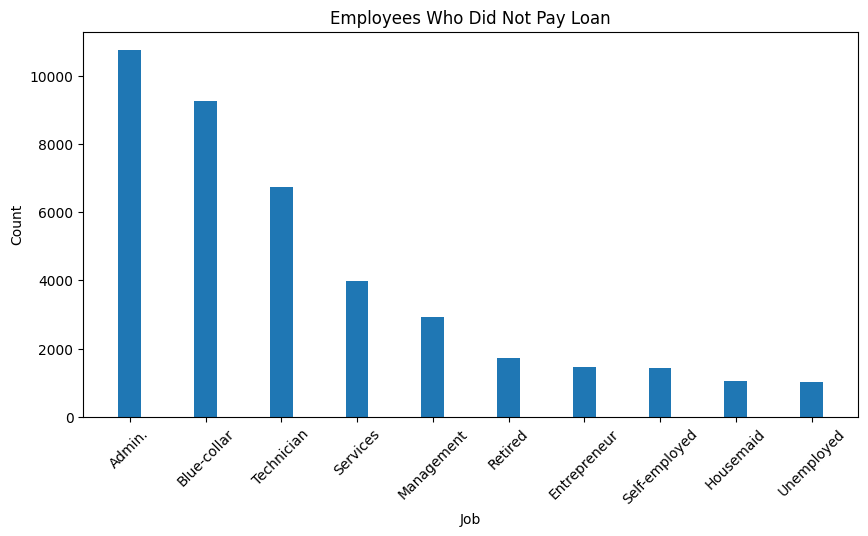

In [307]:
g = df.groupby('job')['Payed loan_Encoded'].value_counts().reset_index(name='Count')
print(g)
g = g[g['Payed loan_Encoded'] == 0]  # only those who did NOT pay loan
g = g.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(g['job'], g['Count'], width=0.3)
plt.title('Employees Who Did Not Pay Loan')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('loan_distribution1.png', dpi=300, bbox_inches='tight')
plt.show()


Employee Who take houseing loan

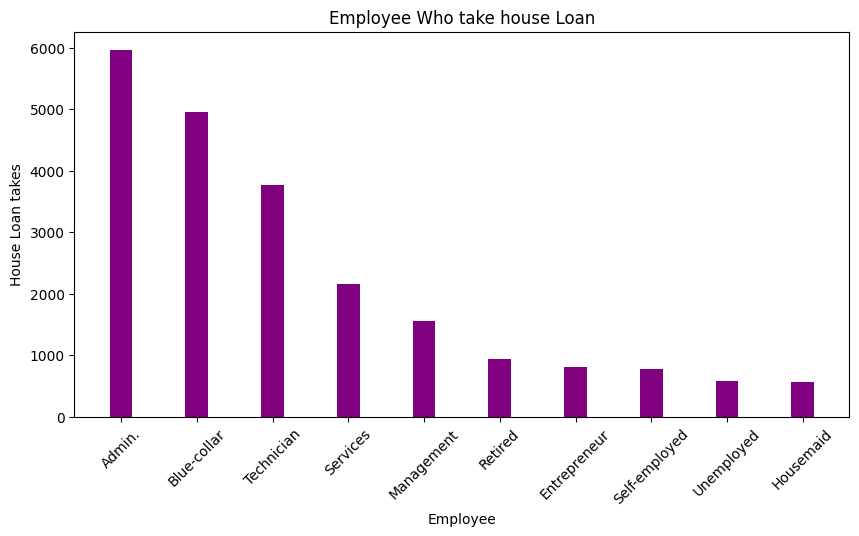

In [308]:
g=df.groupby(by='job')['housing_Encoded'].value_counts().reset_index(name='Count')
g=g[g['housing_Encoded']==1]
g=g.sort_values(by='Count',ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.title('Employee Who take house Loan')
plt.bar(g['job'],g['Count'],color='Purple',width=0.3)
plt.xticks(rotation=45)
plt.xlabel('Employee')
plt.ylabel('House Loan takes')
plt.savefig('loan_distribution2.png', dpi=300, bbox_inches='tight')
plt.show()


Employees who take personal loan

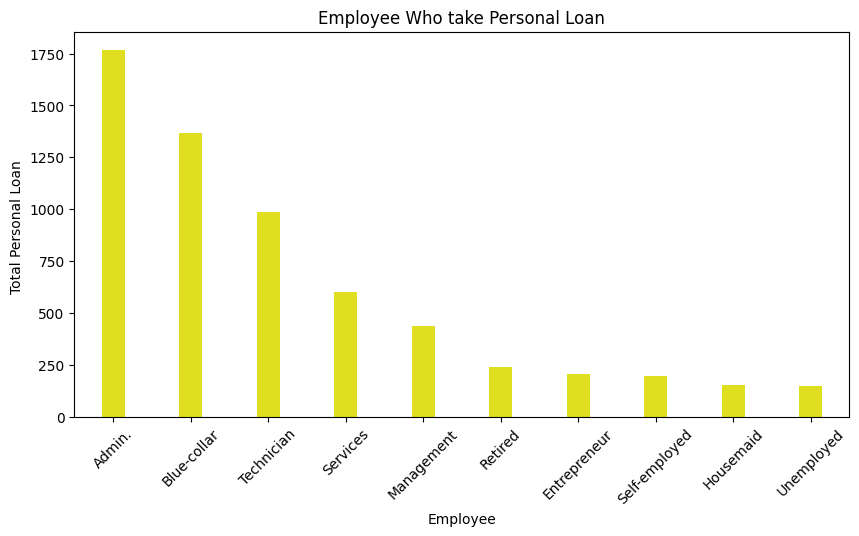

In [309]:
g_=df.groupby(by='job')['loan_Encoded'].value_counts().reset_index(name='count')
g_=g_[g_['loan_Encoded']==1]
plt.figure(figsize=(10,5))
g_=g_.sort_values(by='count',ascending=False).head(10)
plt.title('Employee Who take Personal Loan')
sns.barplot(data=g_, x='job',y='count',color='yellow',width=0.3)
plt.xlabel('Employee')
plt.ylabel('Total Personal Loan ')
plt.xticks(rotation=45)
plt.savefig('loan_distribution3.png', dpi=300, bbox_inches='tight')
plt.show()

Employees who pays loan

>



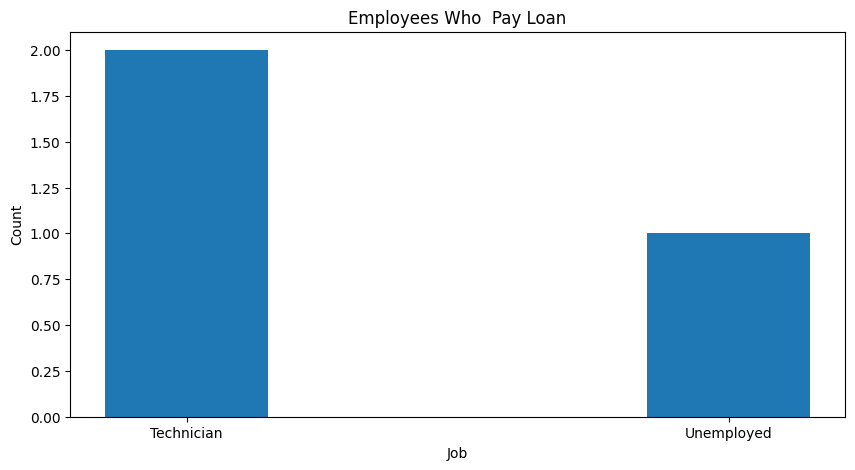

In [310]:
g = df.groupby('job')['Payed loan_Encoded'].value_counts().reset_index(name='Count')

g = g[g['Payed loan_Encoded'] == 1]  # only those who did NOT pay loan
g = g.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(g['job'], g['Count'], width=0.3)
plt.title('Employees Who  Pay Loan')
plt.xlabel('Job')
plt.ylabel('Count')
plt.savefig('loan_distribution4.png', dpi=300, bbox_inches='tight')
plt.show()

Employee / Confidence Consumer


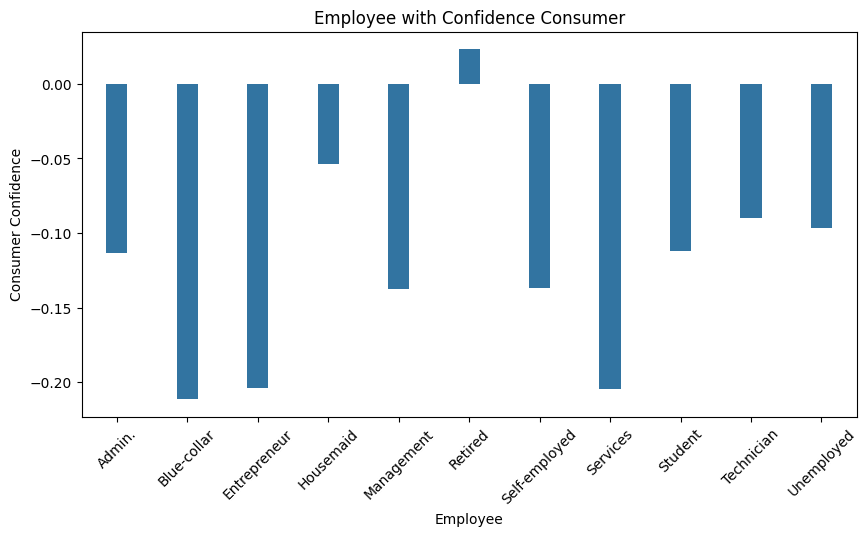

In [311]:
gp = df.groupby('job')['Consumer confidence_Norm'].mean().reset_index(name='Confidence')
plt.figure(figsize=(10,5))
plt.title('Employee with Confidence Consumer')
plt.xlabel('Employee')
plt.ylabel('Consumer Confidence')
sns.barplot(data=gp,x='job',y='Confidence',width=0.3)
plt.xticks(rotation=45)
plt.savefig('loan_distribution5.png', dpi=300, bbox_inches='tight')
plt.show()


Employee with Consumer Price

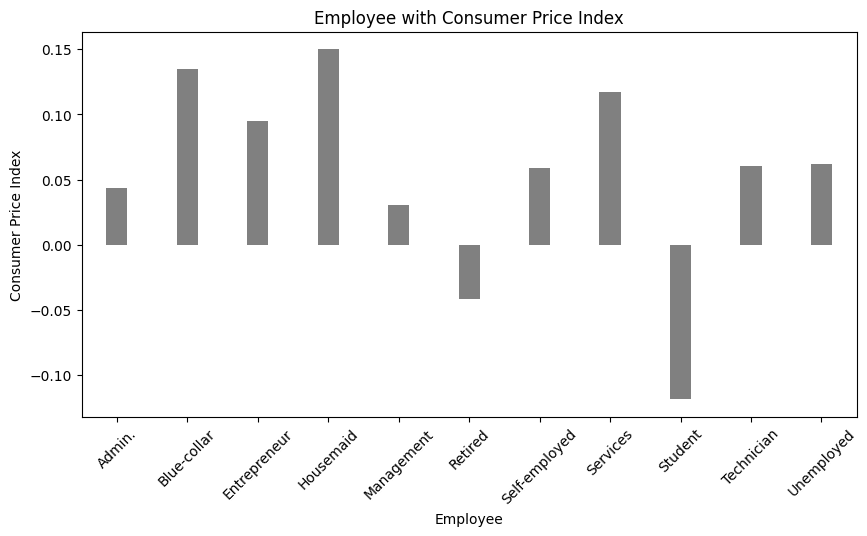

In [312]:
gp = df.groupby('job')['Consumer Price Index_Norm'].mean().reset_index(name='Confidence')
plt.figure(figsize=(10,5))
plt.title('Employee with Consumer Price Index')
plt.xlabel('Employee')
plt.ylabel('Consumer Price Index')
sns.barplot(data=gp,x='job',y='Confidence',width=0.3,color='gray')
plt.xticks(rotation=45)
plt.savefig('loan_distribution6.png', dpi=300, bbox_inches='tight')
plt.show()



Employment variation_Norm



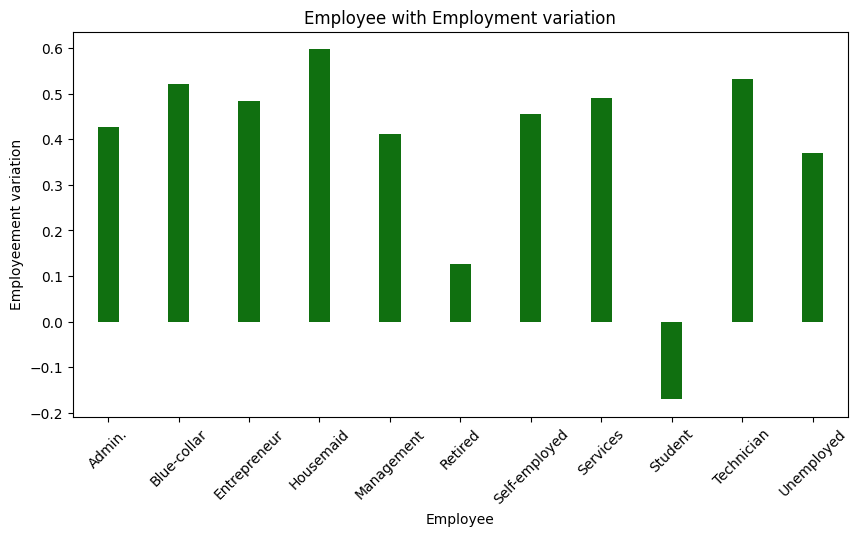

In [313]:
gp = df.groupby('job')['Employment variation_Norm'].mean().reset_index(name='Confidence')
plt.figure(figsize=(10,5))
plt.title('Employee with Employment variation')
plt.xlabel('Employee')
plt.ylabel('Employeement variation')
sns.barplot(data=gp,x='job',y='Confidence',color='green',width=0.3)
plt.xticks(rotation=45)
plt.savefig('loan_distribution7.png', dpi=300, bbox_inches='tight')
plt.show()